In [45]:
from scipy.special import jv
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams["font.size"] = 19
plt.rcParams["xtick.labelsize"] = "large"
plt.rcParams["ytick.labelsize"] = "large"

In [47]:
SAVE_DIR = "images"

# Plots

$$
   S((2n+1)\omega_0) = (\pi E_0)^2\left(\frac{J_n((n+1)\xi)}{(n+1)}- \frac{J_{n+1}(n\xi)}{(n)}\right)^2

$$

$$
    S((2n+1)\omega_0) = (\pi E_0)^2\left(\frac{J_{n-1}(\frac{1}{2}(n+1)\xi)}{\frac{1}{2}(n+1)}- \frac{J_{n+1}\frac{1}{2}((n-1)\xi)}{\frac{1}{2}(n-1)}\right)^2
   $$

In [48]:
def odd(order, xi):
    n = (order-1)//2
    pi = np.pi
    E_0 = 1
    t0 = pi*E_0
    t1 = jv(n, (n+1)*xi)/(n+1)
    t2 = jv(n+1, (n)*xi)/(n)
    return (t0*(t1-t2))**2

In [49]:
def even(order, xi):
    n = order
    pi = np.pi
    E_0 = 1
    t0 = pi*E_0
    t1 = (jv(n-1, (n+1)*xi/2)/((n+1)/2))
    t2 = (jv(n+1, (n-1)*xi/2)/((n-1)/2))
    return (t0*(t1-t2))**2

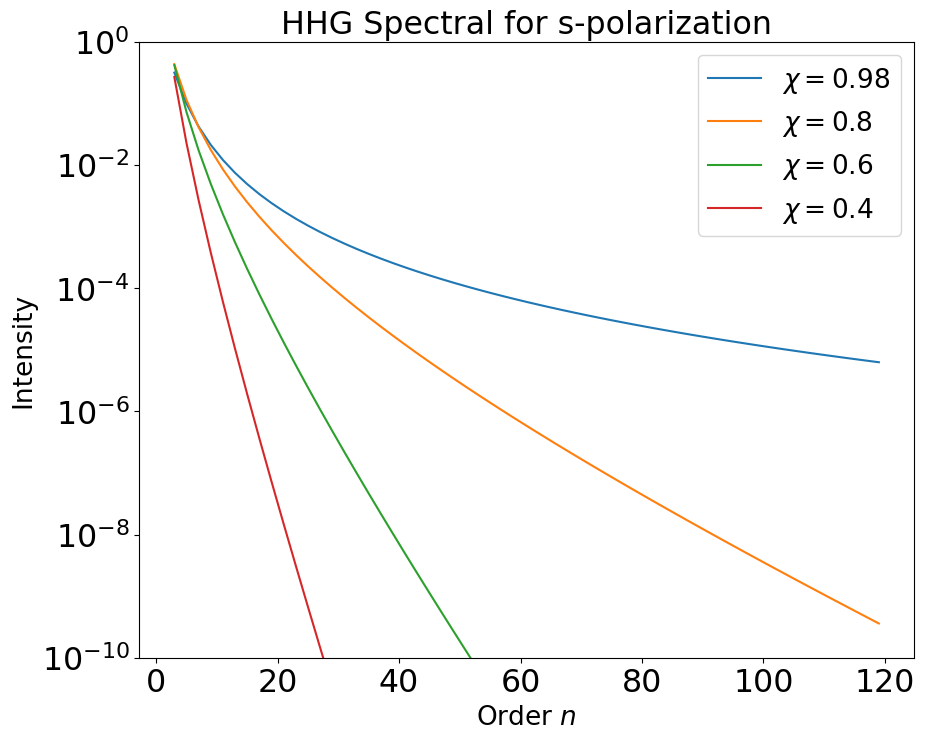

In [50]:
order = np.arange(3, 121, 2)
xi_1 = 0.98
intensities_1 = odd(order, xi_1)
xi_2 = 0.8
intensities_2 = odd(order, xi_2)
xi_3 = 0.6
intensities_3 = odd(order, xi_3)
xi_4 = 0.4
intensities_4 = odd(order, xi_4)

plt.figure(figsize=(10, 8))
plt.plot(order, intensities_1, label='$\chi = 0.98$')
plt.plot(order, intensities_2, label='$\chi = 0.8$')
plt.plot(order, intensities_3, label='$\chi = 0.6$')
plt.plot(order, intensities_4, label='$\chi = 0.4$')
plt.legend()
plt.yscale('log')
plt.xlabel("Order $n$")
plt.ylabel("Intensity")
plt.ylim(1e-10,1)
plt.title("HHG Spectral for s-polarization");

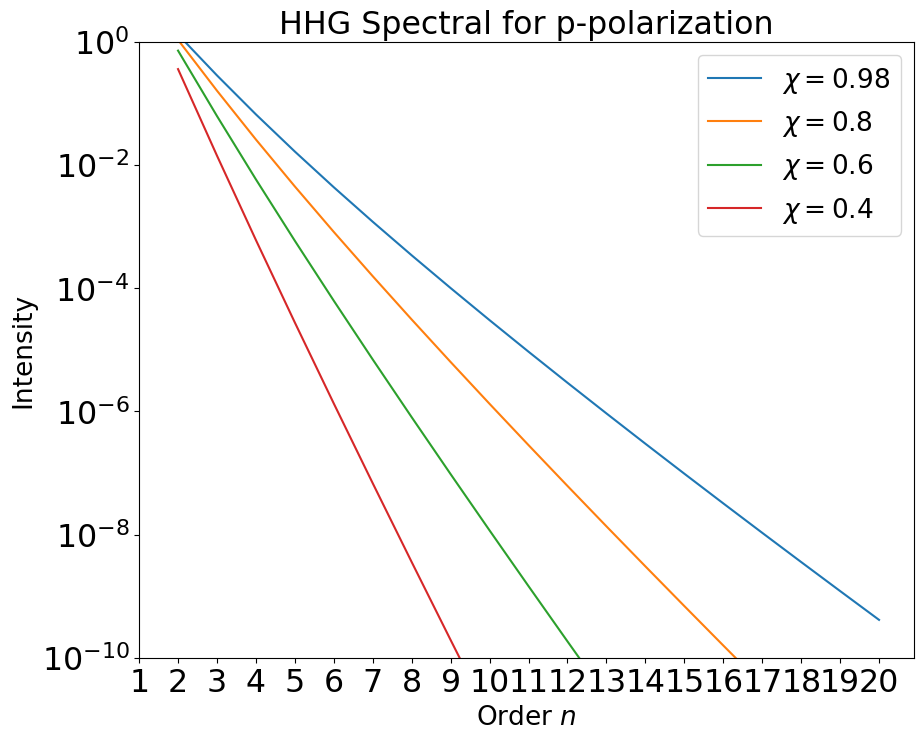

In [51]:
order = np.arange(2, 21)
xi_1 = 0.98
intensities_1 = even(order, xi_1)
xi_2 = 0.8
intensities_2 = even(order, xi_2)
xi_3 = 0.6
intensities_3 = even(order, xi_3)
xi_4 = 0.4
intensities_4 = even(order, xi_4)

plt.figure(figsize=(10, 8))
plt.plot(order, intensities_1, label='$\chi = 0.98$')
plt.plot(order, intensities_2, label='$\chi = 0.8$')
plt.plot(order, intensities_3, label='$\chi = 0.6$')
plt.plot(order, intensities_4, label='$\chi = 0.4$')
plt.legend()
plt.xlabel("Order $n$")
plt.ylabel("Intensity")
plt.yscale('log')
plt.xticks(np.arange(1,21,1))
plt.ylim(1e-10,1)
plt.title("HHG Spectral for p-polarization");

In [56]:
fontdict={
    "size":22
}

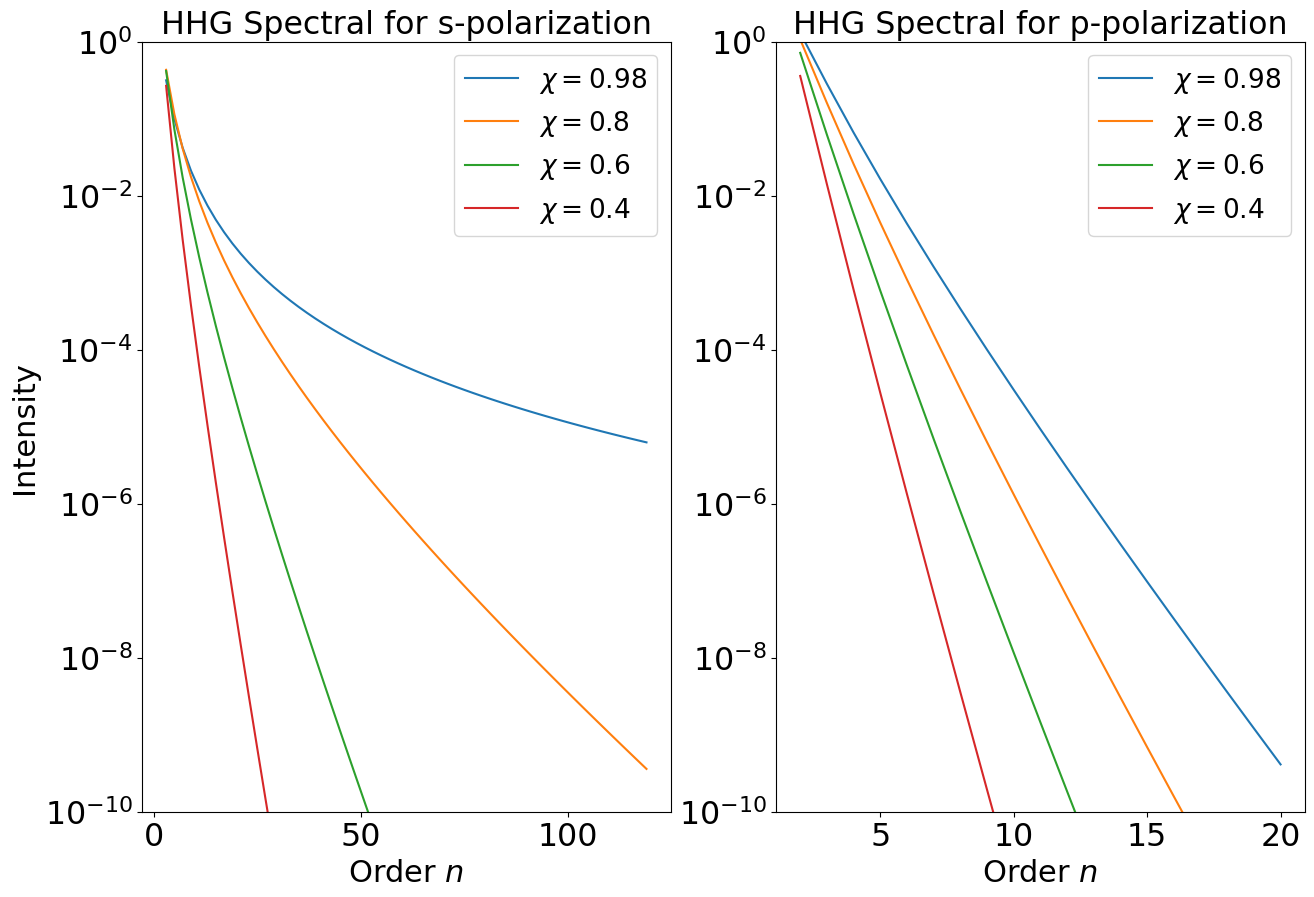

In [63]:
order_even =  np.arange(2, 21)
intensities_1 = even(order_even, xi_1)
xi_2 = 0.8
intensities_2 = even(order_even, xi_2)
xi_3 = 0.6
intensities_3 = even(order_even, xi_3)
xi_4 = 0.4
intensities_4 = even(order_even, xi_4)

fig, axes = plt.subplots(1, 2, figsize = (15, 10))
ax = axes[1]
ax.plot(order_even, intensities_1, label='$\chi = 0.98$')
ax.plot(order_even, intensities_2, label='$\chi = 0.8$')
ax.plot(order_even, intensities_3, label='$\chi = 0.6$')
ax.plot(order_even, intensities_4, label='$\chi = 0.4$')
ax.legend()
ax.set_xlabel("Order $n$", fontdict=fontdict)
# ax.set_ylabel("Intensity", fontdict=fontdict)
ax.set_yscale('log')
ax.set_ylim(1e-10,1)
ax.set_title("HHG Spectral for p-polarization")

order_odd = np.arange(3, 121, 2)
xi_1 = 0.98
intensities_1 = odd(order_odd, xi_1)
xi_2 = 0.8
intensities_2 = odd(order_odd, xi_2)
xi_3 = 0.6
intensities_3 = odd(order_odd, xi_3)
xi_4 = 0.4
intensities_4 = odd(order_odd, xi_4)
xi_1 = 0.98

ax = axes[0]
ax.plot(order_odd, intensities_1, label='$\chi = 0.98$')
ax.plot(order_odd, intensities_2, label='$\chi = 0.8$')
ax.plot(order_odd, intensities_3, label='$\chi = 0.6$')
ax.plot(order_odd, intensities_4, label='$\chi = 0.4$')
ax.legend()
ax.set_xlabel("Order $n$", fontdict=fontdict)
ax.set_ylabel("Intensity", fontdict=fontdict)
ax.set_yscale('log')
ax.set_ylim(1e-10,1)
ax.set_title("HHG Spectral for s-polarization")

plt.savefig(os.path.join(SAVE_DIR, "spectrum.png"), dpi=150)